Found 1634 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/10


2024-03-29 16:29:56.382778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


52/52 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5257

2024-03-29 16:30:08.401231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


52/52 [==============================] - 14s 267ms/step - loss: 0.6951 - accuracy: 0.5257 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 2/10
52/52 [==============================] - 14s 259ms/step - loss: 0.6919 - accuracy: 0.5471 - val_loss: 0.6925 - val_accuracy: 0.5245
Epoch 3/10
52/52 [==============================] - 14s 267ms/step - loss: 0.6872 - accuracy: 0.5606 - val_loss: 0.7032 - val_accuracy: 0.5098
Epoch 4/10
52/52 [==============================] - 15s 281ms/step - loss: 0.6764 - accuracy: 0.5918 - val_loss: 0.7117 - val_accuracy: 0.5319
Epoch 5/10
52/52 [==============================] - 15s 279ms/step - loss: 0.6769 - accuracy: 0.5979 - val_loss: 0.7377 - val_accuracy: 0.5074
Epoch 6/10
52/52 [==============================] - 15s 286ms/step - loss: 0.6493 - accuracy: 0.6353 - val_loss: 0.7473 - val_accuracy: 0.4926
Epoch 7/10
52/52 [==============================] - 15s 281ms/step - loss: 0.6358 - accuracy: 0.6469 - val_loss: 0.8086 - val_accuracy: 0.4853
Epoch 8/10

2024-03-29 16:32:21.327136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 2s 173ms/step - loss: 0.7457 - accuracy: 0.5025
Test Loss: 0.7456837892532349
Test Accuracy: 0.5024510025978088


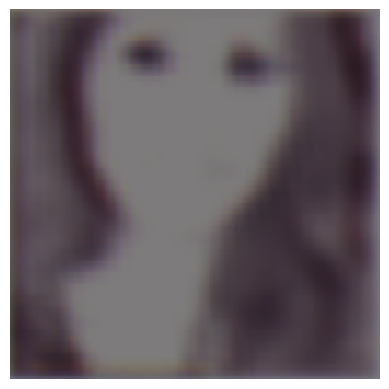

1/1 [==============================] - 0s 38ms/step
The image Nancy Mamani 39.png is classified as FAKE.


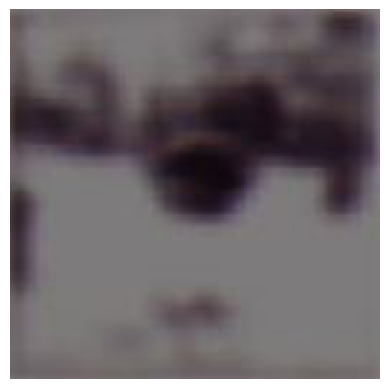

1/1 [==============================] - 0s 12ms/step
The image Tobi.jpeg is classified as FAKE.


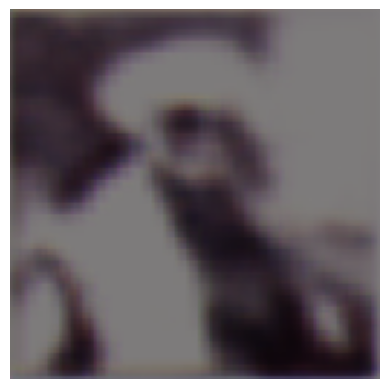

1/1 [==============================] - 0s 11ms/step
The image Francisca Lima 87.png is classified as FAKE.


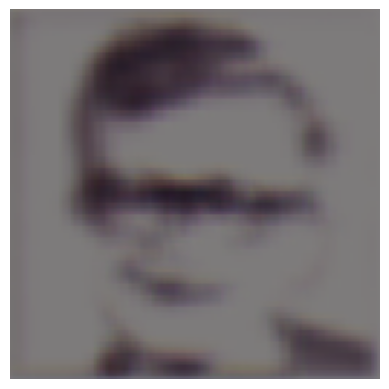

1/1 [==============================] - 0s 11ms/step
The image Herman MacArthur 9.png is classified as FAKE.


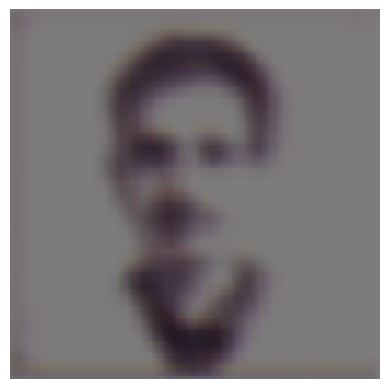

1/1 [==============================] - 0s 11ms/step
The image Vicente Ant¿«nio 44.png is classified as FAKE.


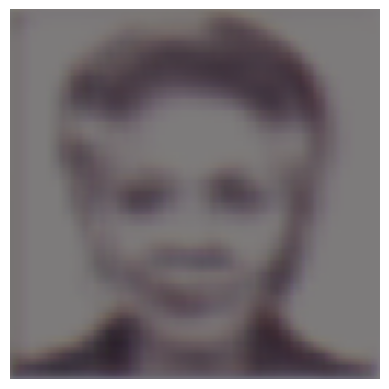

1/1 [==============================] - 0s 11ms/step
The image Natalia Yakubu 74.png is classified as FAKE.


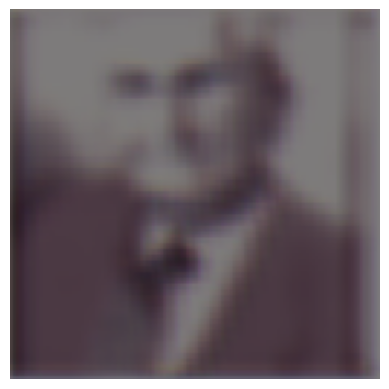

1/1 [==============================] - 0s 11ms/step
The image Alexandre Hou age 95.png is classified as FAKE.


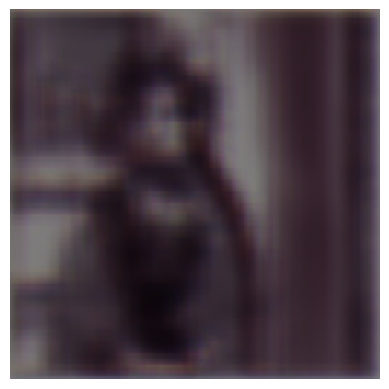

1/1 [==============================] - 0s 11ms/step
The image Nadezehda Tiwari 24.png is classified as FAKE.


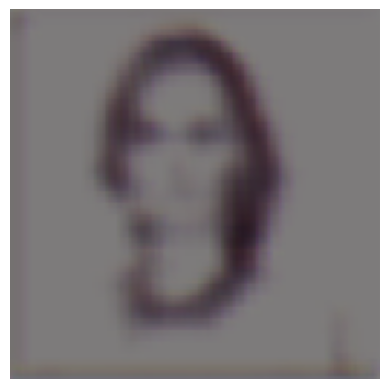

1/1 [==============================] - 0s 11ms/step
The image Emily Van 29.png is classified as FAKE.


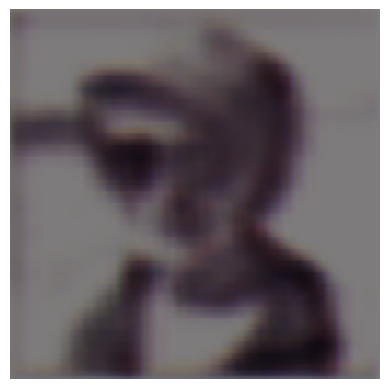

1/1 [==============================] - 0s 11ms/step
The image Sai Muhamad 84.png is classified as FAKE.


In [21]:
# Part 1---Image classification

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining data generators
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  

train_generator = datagen.flow_from_directory(
    '/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Assignment 4--Image classification(Tensorflow)/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    '/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Assignment 4--Image classification(Tensorflow)/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluating the model on the test set 
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#  Predicting the class of images
def predict_image_class(image_path, model):
    # Loading and preprocessing the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    
    # Make predictions
    prediction = model.predict(img_array)
    
    # Converting prediction to class label
    if prediction[0] >= 0.5:
        return "FAKE"
    else:
        return "REAL"

# Define the path to the folder containing images
folder_path = '/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Assignment 4--Image classification(Tensorflow)/Compressed Images'

# List all image filenames in the folder
image_filenames = os.listdir(folder_path)

# Randomly selecting 10 image filenames
random_image_filenames = random.sample(image_filenames, k=10)

# Display and predict each randomly selected image
for filename in random_image_filenames:
    img_path = os.path.join(folder_path, filename)

    # Load and display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict the class of the image
    predicted_class = predict_image_class(img_path, model)
    print(f"The image {filename} is classified as {predicted_class}.")


In [20]:
# PART 2--- Image Compression
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image

# Defining the dimensions of the input images
input_shape = (128, 128, 3)

# Defining the encoder part of the CNN model
input_img = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Defining the decoder part of the CNN model
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Creating the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


dataset_path = '/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Assignment 4--Image classification(Tensorflow)/IMAGES'

# Listing all image filenames in the dataset folder
image_filenames = os.listdir(dataset_path)

# Preparing the images for training
X_train = []
for filename in image_filenames:
    img_path = dataset_path + '/' + filename
    img = load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    X_train.append(img_array)
X_train = np.array(X_train)

# Training the autoencoder model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32)

# Compressing the images using the encoder part of the model
compressed_images = autoencoder.predict(X_train)

# Saving the compressed images
output_path_compressed = '/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Assignment 4--Image classification(Tensorflow)/Compressed Images'
os.makedirs(output_path_compressed, exist_ok=True)
for i, filename in enumerate(image_filenames):
    compressed_img = compressed_images[i] * 255.0  # Rescale to original pixel range
    compressed_img = compressed_img.astype(np.uint8)
    output_img_path_compressed = output_path_compressed + '/' + filename
    img_compressed = Image.fromarray(compressed_img)
    img_compressed.save(output_img_path_compressed)

Epoch 1/10
3/3 [==============================] - 1s 105ms/step - loss: 0.6931
Epoch 2/10
3/3 [==============================] - 0s 104ms/step - loss: 0.6916
Epoch 3/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6896
Epoch 4/10
3/3 [==============================] - 0s 99ms/step - loss: 0.6865
Epoch 5/10
3/3 [==============================] - 0s 100ms/step - loss: 0.6819
Epoch 6/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6753
Epoch 7/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6676
Epoch 8/10
3/3 [==============================] - 0s 101ms/step - loss: 0.6586
Epoch 9/10
3/3 [==============================] - 0s 100ms/step - loss: 0.6478
Epoch 10/10
3/3 [==============================] - 0s 25ms/step
